<a href="https://colab.research.google.com/github/maryumk8/Python_Summative/blob/main/Summative_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

**Mount Google Drive**

In [ ]:
#Importing the drive module
from google.colab import drive

# Mount Google Drive to access files from it
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Install Libraries**

In [ ]:
#Pip command to install pandas and tabula libraries
!pip install pandas tabula-py


**Import Libraries**

In [ ]:
#Import tabula and pandas libraries and aliasing pandas as pd
import pandas as pd
import tabula
import numpy as np



**Load Excel Data**

In [ ]:
#Loading excel data into a dataFrame
excel_data = pd.read_excel('/content/drive/MyDrive/Python_dataset/APEX Loan Data (3).xlsx')

**Extract Tables from PDF**

In [ ]:
# Read PDF tables into a list of DataFrames
pdf_data = tabula.read_pdf('/content/drive/MyDrive/Python_dataset/APEX_Loans_Database_Table (3).pdf', output_format='dataframe', pages="all")

**Concatenate Dataframes**

In [ ]:
combined_df = pd.concat([pdf_data[0], excel_data], ignore_index=True)

# Mapping dictionaries
mappings = {
    'Gender': {1: 'Male', 2: 'Female'},
    'Married': {0: 'Single', 1: 'Married'},
    'Dependents': {0: '0', 1: '1', 2: '2', 3: '3+'},
    'Graduate': {0: 'No', 1: 'Yes'},
    'Self_Employed': {0: 'No', 1: 'Yes'},
    'Credit_History': {0: 'No', 1: 'Yes'},
    'Property_Area': {1: 'Urban', 2: 'Semiurban', 3: 'Rural'}
}

# Apply mappings using a loop
for column, mapping in mappings.items():
    combined_df[column] = combined_df[column].map(mapping)

combined_df


,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,Male,Single,0,Yes,No,5849,0.0,128,360,Yes,Urban,Y
1,1003,Male,Married,1,Yes,No,4583,1508.0,128,360,Yes,Rural,N
2,1005,Male,Married,0,Yes,Yes,3000,0.0,66,360,Yes,Urban,Y
3,1006,Male,Married,0,No,No,2583,2358.0,120,360,Yes,Urban,Y
4,1008,Male,Single,0,Yes,No,6000,0.0,141,360,Yes,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,2978,Female,Single,0,Yes,No,2900,0.0,71,333,Yes,Rural,Y
641,2979,Male,Married,3+,Yes,No,4106,0.0,40,180,Yes,Rural,Y
642,2983,Male,Married,1,Yes,No,8072,240.0,253,333,Yes,Urban,Y
643,2984,Male,Married,2,Yes,No,7583,0.0,187,333,Yes,Urban,Y


# Task 2

**Handling Missing Values**

In [ ]:
def check_missing_values(df, df_name):
    # Check and print if the given dataframe has missing values.
    if df.isnull().sum().sum() > 0:
        print(f"Data in {df_name} contains missing values.")
    else:
        print(f"No missing values found in {df_name}.")

# Define the single dataframe and its name
df_name = 'AFS data'
df = combined_df

# Apply the function to the dataframe
check_missing_values(df, df_name)


No missing values found in AFS data.


**Removing Duplicates**

In [ ]:
def remove_duplicates(df, df_name):
    # Remove duplicates from a dataframe and print the operation.
    initial_count = len(df)
    df.drop_duplicates(inplace=True)
    final_count = len(df)
    print(f"Duplicates removed from {df_name}: {initial_count - final_count} duplicates found.")

# Define the single dataframe and its name
df_name = 'AFS data'
df = combined_df

# Apply the function to the dataframe
remove_duplicates(df, df_name)


Duplicates removed from AFS data: 3 duplicates found.


**Handling Outliers**

In [ ]:
def remove_outliers(df, df_name):
    # Select only numeric columns for quantile calculation
    numeric_df = df.select_dtypes(include=[np.number])

    if not numeric_df.empty:
        Q1 = numeric_df.quantile(0.25)
        Q3 = numeric_df.quantile(0.75)
        IQR = Q3 - Q1

        initial_count = len(df)
        # Filter out the outliers using conditions applied only on numeric columns
        filter_condition = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))
        df = df[~filter_condition.any(axis=1)]
        final_count = len(df)

        print(f"Outliers removed from {df_name}: {initial_count - final_count} outliers removed.")
    else:
        print(f"No numeric data to process in {df_name}.")
    return df

# Define the single dataframe and its name
df_name = 'AFS data'
df = combined_df
# Apply the function to the dataframe
df = remove_outliers(df, df_name)


Outliers removed from AFS data: 155 outliers removed.


**Exploratory Data Analysis (EDA)**

Descriptive Analysis for AFS Data
Total Amount Loaned: $95,164.00
Average Amount Loaned: $148.23
Average Loan Term: 334.4392523364486 months
Gender       Female  Male
Loan_Status              
N                37   161
Y                80   364


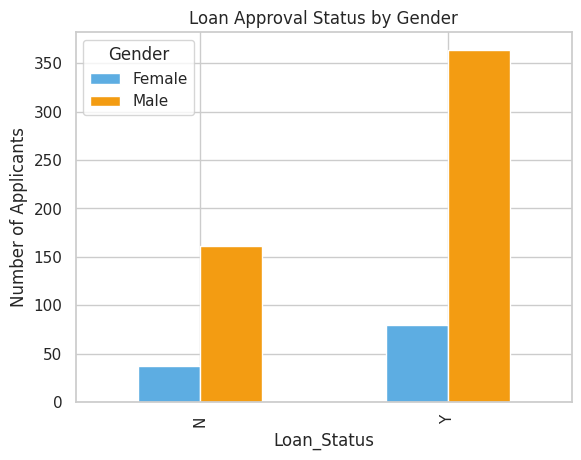

Maximum Loaned Amount: $700.00
Minimum Loaned Amount: $9.00


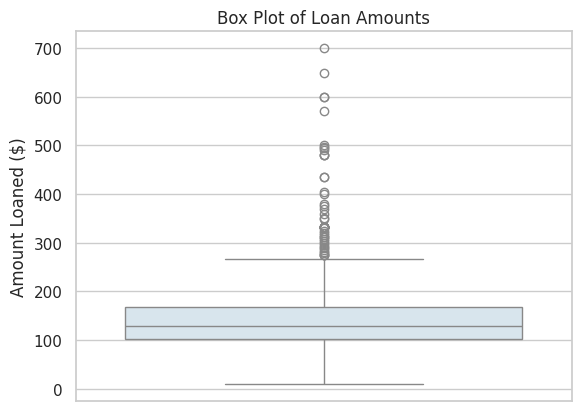

Percentage of Self-Employed with Approved Loans: 12.61%


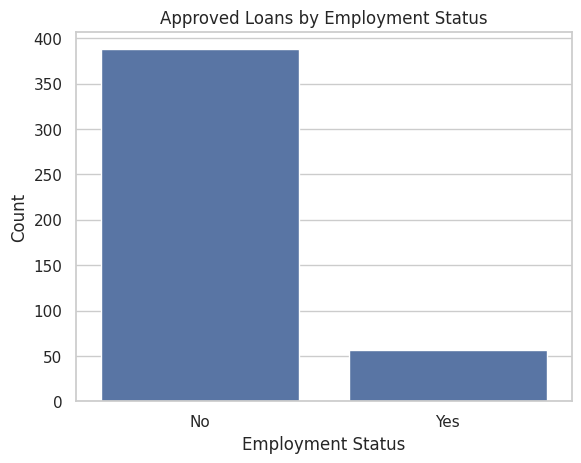

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

def analyze_loan_data(loan_df, df_name):
    print(f"Descriptive Analysis for {df_name}")

    # Handle missing values and convert appropriate columns to numeric
    for column in loan_df.columns:
        if loan_df[column].dtype == 'object':
            try:
                loan_df[column] = pd.to_numeric(loan_df[column], errors='raise')
            except ValueError:
                loan_df[column] = loan_df[column].astype('category')

    # Fill missing numeric values with the median
    loan_df = loan_df.apply(lambda x: x.fillna(x.median()) if x.dtype in ['float64', 'int64'] else x)

    # Fill missing categorical values with the mode
    for column in loan_df.select_dtypes(include=['category']).columns:
        loan_df[column].fillna(loan_df[column].mode()[0], inplace=True)

    # Total and Average Amount Loaned
    total_loaned = loan_df['LoanAmount'].sum()
    average_loaned = loan_df['LoanAmount'].mean()
    print(f"Total Amount Loaned: ${total_loaned:,.2f}")
    print(f"Average Amount Loaned: ${average_loaned:,.2f}")

    # Average Loan Term
    average_loan_term = loan_df['Loan_Amount_Term'].mean()
    print(f"Average Loan Term: {average_loan_term} months")

    # Total number of applicants by Approval Status and Gender
    approval_gender_counts = loan_df.groupby(['Loan_Status', 'Gender']).size().unstack(fill_value=0)
    print(approval_gender_counts)

    # Plotting Approval Status by Gender with custom colors
    fig, ax = plt.subplots()
    approval_gender_counts.plot(kind='bar', ax=ax, color=['#5DADE2', '#F39C12'])
    ax.set_title('Loan Approval Status by Gender')
    ax.set_ylabel('Number of Applicants')
    plt.show()

    # Maximum and Minimum Amounts Loaned
    max_loaned = loan_df['LoanAmount'].max()
    min_loaned = loan_df['LoanAmount'].min()
    print(f"Maximum Loaned Amount: ${max_loaned:,.2f}")
    print(f"Minimum Loaned Amount: ${min_loaned:,.2f}")

    # Plot for Loan Amounts with custom colors
    fig, ax = plt.subplots()
    sns.boxplot(data=loan_df['LoanAmount'], ax=ax, color='#D4E6F1')
    ax.set_title('Box Plot of Loan Amounts')
    ax.set_ylabel('Amount Loaned ($)')
    plt.show()

    # Percentage of Self-Employed Approved Loans
    approved_loans = loan_df[loan_df['Loan_Status'] == 'Y']
    self_employed_approved = approved_loans[approved_loans['Self_Employed'] == 'Yes']
    percentage_self_employed_approved = (len(self_employed_approved) / len(approved_loans)) * 100 if len(approved_loans) > 0 else 0
    print(f"Percentage of Self-Employed with Approved Loans: {percentage_self_employed_approved:.2f}%")

    # Plot for Approved Loans by Employment Status with custom colors
    fig, ax = plt.subplots()
    sns.countplot(x='Self_Employed', data=approved_loans)
    ax.set_title('Approved Loans by Employment Status')
    ax.set_xlabel('Employment Status')
    ax.set_ylabel('Count')
    plt.show()


analyze_loan_data(combined_df, 'AFS Data')


**Income Distribution of All Main Applicants**

MEAN INCOME =  5370.386292834891 , STANDARD DEVIATION =  6035.008000801144


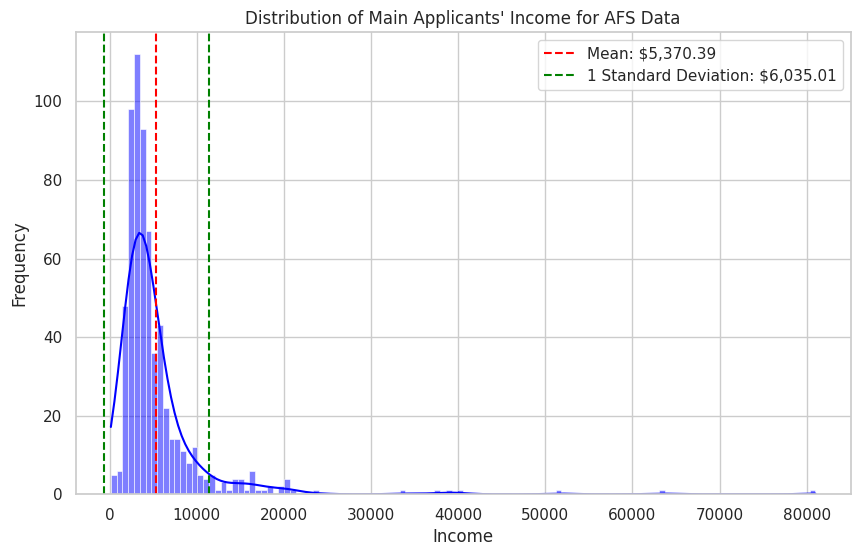

In [ ]:
def analyze_applicant_income(loan_df, df_name):
    plt.figure(figsize=(10, 6))

    # Convert 'ApplicantIncome' to a numeric type, coerce errors to NaN
    loan_df['ApplicantIncome'] = pd.to_numeric(loan_df['ApplicantIncome'], errors='coerce')

    sns.histplot(loan_df['ApplicantIncome'].dropna(), kde=True, color='blue')
    plt.title(f'Distribution of Main Applicants\' Income for {df_name}')
    plt.xlabel('Income')
    plt.ylabel('Frequency')

    # Calculate mean and standard deviation on the numeric, non-NaN data
    mean_income = loan_df['ApplicantIncome'].mean()
    std_income = loan_df['ApplicantIncome'].std()
    print('MEAN INCOME = ',mean_income, ', STANDARD DEVIATION = ',std_income)
    plt.axvline(mean_income, color='red', linestyle='--', label=f'Mean: ${mean_income:,.2f}')
    plt.axvline(mean_income + std_income, color='green', linestyle='--', label=f'1 Standard Deviation: ${std_income:,.2f}')
    plt.axvline(mean_income - std_income, color='green', linestyle='--')
    plt.legend()

    plt.show()

# Call the function with DataFrames
analyze_applicant_income(combined_df, 'AFS Data')

**Top Ten Applicants by Loan Amount**

In [ ]:
def top_ten_applicants_by_loan_amount(loan_df,file_name):
    print('Top Ten Applicants by Loan Amount',file_name)
    top_ten = loan_df.nlargest(10, 'LoanAmount')
    print(top_ten[['Loan_ID', 'ApplicantIncome', 'LoanAmount']])

    # Call the function with  DataFrame
top_ten_applicants_by_loan_amount(combined_df, 'AFS Data')

Top Ten Applicants by Loan Amount AFS Data
     Loan_ID  ApplicantIncome  LoanAmount
171     1585            51763         700
130     1469            20166         650
155     1536            39999         600
592     2813            19484         600
369     2191            19730         570
518     2547            18333         500
635     2959            12000         496
177     1610             5516         495
333     2101            63337         490
308     1996            20233         480


**Distribution of Property Types Among Loan Applicants**




Distribution of Property Types For AFS Data


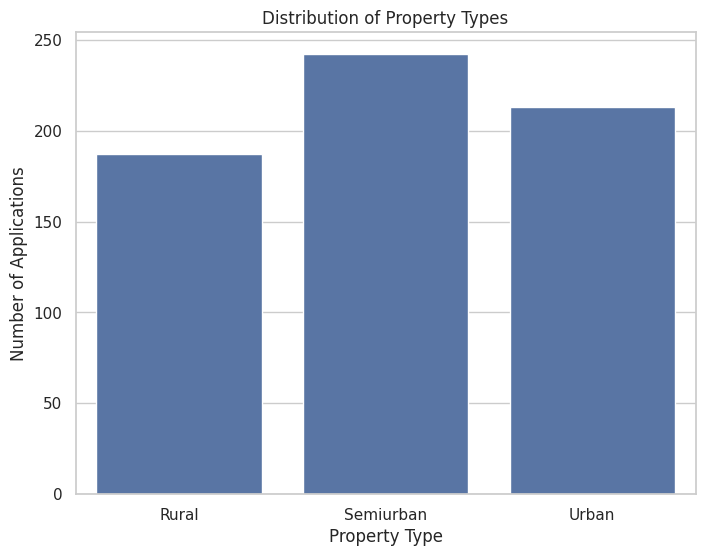

In [ ]:
def property_distribution(loan_df,file_name):
    print('Distribution of Property Types For',file_name)

    plt.figure(figsize=(8, 6))
    sns.countplot(x='Property_Area', data=loan_df)
    plt.title('Distribution of Property Types')
    plt.xlabel('Property Type')
    plt.ylabel('Number of Applications')
    plt.show()

  # Call the function with  DataFrame
property_distribution(combined_df, 'AFS Data')

In [ ]:

# Step 1: Install necessary libraries
!pip install pandas openpyxl

# Step 2: Import libraries
import pandas as pd
from google.colab import files


df = pd.DataFrame(combined_df)

# Step 4: Save the DataFrame to an Excel file
file_name = 'Afs_data.xlsx'
df.to_excel(file_name, index=False)

# Step 5: Download the file
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>